In [31]:
import numpy as np
import pandas as pd
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:

dataset_url = "https://raw.githubusercontent.com/nitesh31mishra/Sentiment-Analysis-of-tweets/master/Tweets.csv"  
dataset = pd.read_csv(dataset_url, encoding = "utf-8")  
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


<AxesSubplot:ylabel='airline_sentiment'>

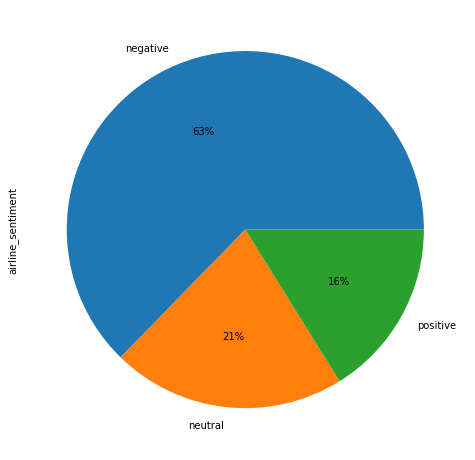

In [37]:
plt.rcParams["figure.figsize"] = [8,10] 
dataset.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

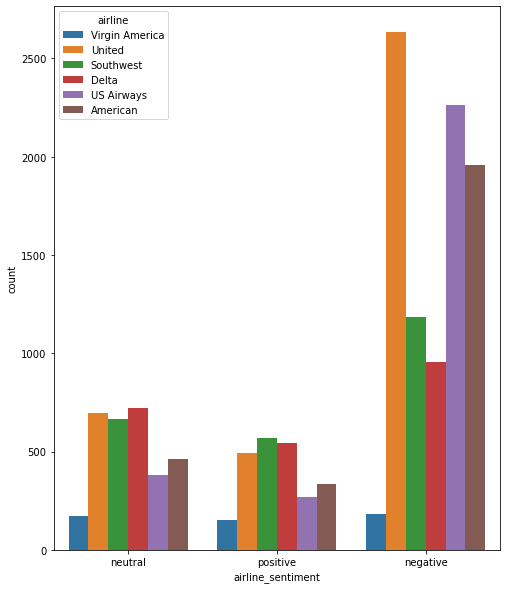

In [38]:
sns.countplot(x='airline_sentiment', data=dataset, hue = 'airline')

In [39]:
# we need to remove numbers and digits from tweets
# We will define a function named text_preprocess() that accepts a text string and removes everything from the text except the alphabets
def text_preprocess(sen): 

   sen = re.sub('[^a-zA-Z]', ' ', sen)

   sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)

   sen = re.sub(r'\s+', ' ', sen)

   return sen

In [40]:
X = dataset["text"]  
 
y = dataset["airline_sentiment"]

In [41]:
X_tweets = []  
messages = list(X)  
for mes in messages:  
    X_tweets.append(text_preprocess(mes))

In [43]:
# Since machine learning algorithms are based on mathematics and mathematics works with numbers, you need to convert your text tweets into numeric form
# from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import TfidfVectorizer  
import nltk
nltk.download('stopwords')  
tfidf_vec = TfidfVectorizer (max_features=5000, min_df=50, max_df=0.8, stop_words=stopwords.words('english'))  
X= tfidf_vec.fit_transform(X_tweets).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eelif\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [44]:
# dividing data into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
# we will use random forest as the classification algorithm
from sklearn.ensemble import RandomForestClassifier 

rf_clf = RandomForestClassifier(n_estimators=250, random_state=0) 
rf_clf.fit(X_train, y_train) 
y_pred = rf_clf.predict(X_test)

In [46]:
# evaluating the algortithms
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test,y_pred))
# The output shows that we are able to successfully classify a tweet as positive, negative, or neutral with an accuracy of 75.92%

[[2154  116   70]
 [ 376  293   69]
 [ 171   79  332]]
              precision    recall  f1-score   support

    negative       0.80      0.92      0.85      2340
     neutral       0.60      0.40      0.48       738
    positive       0.70      0.57      0.63       582

    accuracy                           0.76      3660
   macro avg       0.70      0.63      0.65      3660
weighted avg       0.74      0.76      0.74      3660

0.7592896174863388
